Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Abigail Villacorta"
COLLABORATORS = "None"

Github: https://github.com/aev25/Genre-Detection

---

## Download the data
https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data
- drag the folders and csv files that are inside the data folder to the file the notebook is in.
  * genres_original (folder)
  * images_original (folder)
  * features_3_sec.csv (csv file)
  * features_30_sec.csv (csv file)

## Install these libraries
* librosa
* pandas
* numpy
* matplotlib
* seaborn
* scikit-learn
* tensorflow
* sqlalchemy

In [22]:
pip install librosa pandas numpy matplotlib seaborn scikit-learn tensorflow sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
# Import these libraries
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from sqlalchemy import create_engine

In [44]:
# Define file paths
base_path = "/home/aev64/cs210/Course Project - Final Submissions"
csv_30_sec_path = os.path.join(base_path, "features_30_sec.csv")
csv_3_sec_path = os.path.join(base_path, "features_3_sec.csv")

# Load datasets
features_30_sec_df = pd.read_csv(csv_30_sec_path)
features_3_sec_df = pd.read_csv(csv_3_sec_path)

# Display the first few rows of each dataset
print("30-sec Dataset:")
print(features_30_sec_df.head())

print("\n3-sec Dataset:")
print(features_3_sec_df.head())

30-sec Dataset:
          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              203

## Displaying the dataset

In [68]:
f1 = features_30_sec.head(20)  # Display the first 20 rows
f1

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.508633,...,72.549225,-1.838263,68.702026,-2.783800,42.447453,-3.047909,39.808784,-8.109991,46.311005,blues
6,blues.00006.wav,661794,0.291328,0.093981,0.141874,0.008803,1459.366472,4.378594e+05,1389.009131,185023.239545,...,83.248245,-10.913176,56.902153,-6.971336,38.231800,-3.436505,48.235741,-6.483466,70.170364,blues
7,blues.00007.wav,661794,0.307955,0.092903,0.131822,0.005531,1451.667066,4.495682e+05,1577.270941,168211.938804,...,70.438438,-10.568935,52.090893,-10.784515,60.461330,-4.690678,65.547516,-8.630722,56.401436,blues
8,blues.00008.wav,661794,0.408879,0.086512,0.142416,0.001507,1719.368948,1.632828e+05,2031.740381,105542.718193,...,50.563751,-7.041824,28.894934,2.695248,36.889568,3.412305,33.698597,-2.715692,36.418430,blues
9,blues.00009.wav,661794,0.273950,0.092316,0.081314,0.004347,1817.150863,2.982361e+05,1973.773306,114070.112591,...,59.314602,-1.916804,58.418438,-2.292661,83.205231,2.881967,77.082222,-4.235203,91.468811,blues


Showing only the columns: chroma stft mean, rms mean, tempo, and label.

In [71]:
important_columns = features_30_sec[['chroma_stft_mean', 'rms_mean', 'tempo', 'label']]
f2 = important_columns.head()
f2

,chroma_stft_mean,rms_mean,tempo,label
0,0.350088,0.130228,123.046875,blues
1,0.340914,0.095948,67.999589,blues
2,0.363637,0.175570,161.499023,blues
3,0.404785,0.141093,63.024009,blues
4,0.308526,0.091529,135.999178,blues


In [41]:
important_columns = [
    'filename', 'chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean',
    'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean',
    'tempo', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean', 'mfcc4_mean', 'label'
]

# Filter datasets
filtered_30_sec_df = features_30_sec_df[important_columns]
filtered_3_sec_df = features_3_sec_df[important_columns]

print("Filtered 30-sec Dataset:")
print(filtered_30_sec_df.head())

print("\nFiltered 3-sec Dataset:")
print(filtered_3_sec_df.head())

Filtered 30-sec Dataset:
          filename  chroma_stft_mean  rms_mean  spectral_centroid_mean  \
0  blues.00000.wav          0.350088  0.130228             1784.165850   
1  blues.00001.wav          0.340914  0.095948             1530.176679   
2  blues.00002.wav          0.363637  0.175570             1552.811865   
3  blues.00003.wav          0.404785  0.141093             1070.106615   
4  blues.00004.wav          0.308526  0.091529             1835.004266   

   spectral_bandwidth_mean  rolloff_mean  zero_crossing_rate_mean       tempo  \
0              2002.449060   3805.839606                 0.083045  123.046875   
1              2039.036516   3550.522098                 0.056040   67.999589   
2              1747.702312   3042.260232                 0.076291  161.499023   
3              1596.412872   2184.745799                 0.033309   63.024009   
4              1748.172116   3579.757627                 0.101461  135.999178   

   mfcc1_mean  mfcc2_mean  mfcc3_mean  mfcc

In [45]:
# Create a SQLite engine
db_path = os.path.join(base_path, "music_genre_classification.db")
engine = create_engine(f'sqlite:///{db_path}')

# Save datasets to the database
filtered_30_sec_df.to_sql("features_30_sec", con=engine, if_exists='replace', index=False)
filtered_3_sec_df.to_sql("features_3_sec", con=engine, if_exists='replace', index=False)

print("Data saved to database.")

Data saved to database.


In [46]:
# Query and display data
query = "SELECT * FROM features_30_sec LIMIT 10"
result = pd.read_sql(query, con=engine)
print("Sample Data from SQL (30-sec dataset):")
print(result)

Sample Data from SQL (30-sec dataset):
          filename  chroma_stft_mean  rms_mean  spectral_centroid_mean  \
0  blues.00000.wav          0.350088  0.130228             1784.165850   
1  blues.00001.wav          0.340914  0.095948             1530.176679   
2  blues.00002.wav          0.363637  0.175570             1552.811865   
3  blues.00003.wav          0.404785  0.141093             1070.106615   
4  blues.00004.wav          0.308526  0.091529             1835.004266   
5  blues.00005.wav          0.302456  0.103494             1831.993940   
6  blues.00006.wav          0.291328  0.141874             1459.366472   
7  blues.00007.wav          0.307955  0.131822             1451.667066   
8  blues.00008.wav          0.408879  0.142416             1719.368948   
9  blues.00009.wav          0.273950  0.081314             1817.150863   

   spectral_bandwidth_mean  rolloff_mean  zero_crossing_rate_mean       tempo  \
0              2002.449060   3805.839606                 0.083045

In [47]:
# Encode labels and split data
X = filtered_30_sec_df.drop(columns=['filename', 'label'])
y = pd.factorize(filtered_30_sec_df['label'])[0]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# One-hot encode labels for neural network
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [48]:
# Build a neural network model
from tensorflow.keras import Input
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_onehot.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1446 - loss: 2.2493 - val_accuracy: 0.3250 - val_loss: 2.0437
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2877 - loss: 2.0283 - val_accuracy: 0.3375 - val_loss: 1.8940
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3720 - loss: 1.8543 - val_accuracy: 0.3812 - val_loss: 1.7741
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4145 - loss: 1.7345 - val_accuracy: 0.4000 - val_loss: 1.6810
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3855 - loss: 1.7164 - val_accuracy: 0.4250 - val_loss: 1.6015
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4056 - loss: 1.6455 - val_accuracy: 0.4563 - val_loss: 1.5403
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4353 - loss: 1.5950 - val_accuracy: 0.4563 - val_loss: 1.4830
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4511 - loss: 1.5059 - val_accuracy: 0.5250 - val_

In [49]:
# Evaluate on test data
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.35      0.37        20
           1       0.72      1.00      0.84        13
           2       0.33      0.19      0.24        27
           3       0.48      0.48      0.48        21
           4       0.29      0.33      0.31        15
           5       0.58      0.68      0.62        22
           6       0.54      0.84      0.66        25
           7       0.47      0.62      0.53        13
           8       0.40      0.26      0.32        23
           9       0.29      0.19      0.23        21

    accuracy                           0.47       200
   macro avg       0.45      0.49      0.46       200
weighted avg       0.44      0.47      0.44       200

Model Accuracy: 0.47


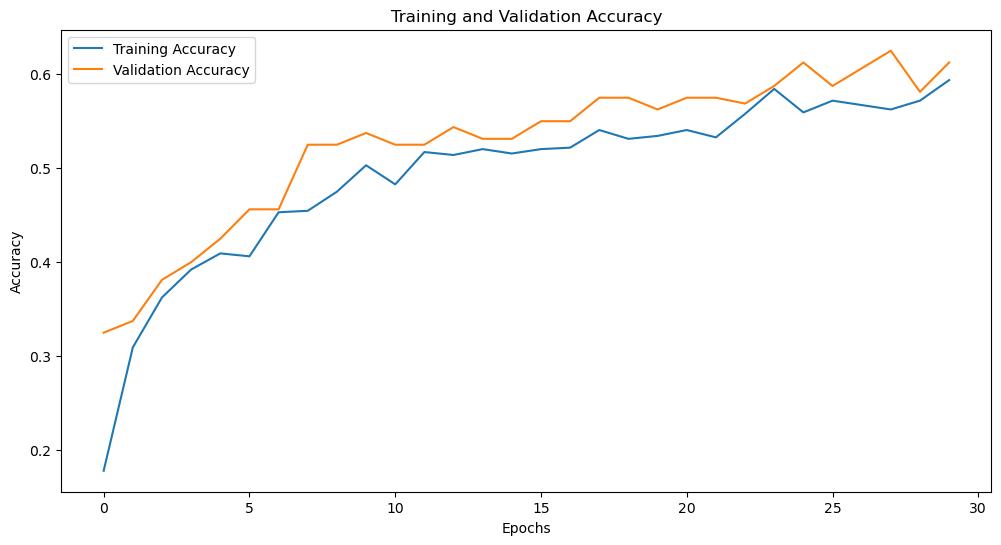

In [50]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

## CNN Model for Spectrograms
This will use the images that are stored in images_original to train in Convolutional Neural Network.

In [51]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [52]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths
images_path = "/home/aev64/cs210/Course Project - Final Submissions/images_original"

# Image dimensions
img_height, img_width = 128, 128  # Resize all images to this dimension

# Prepare data
labels = []
images = []

# Load images and their labels
valid_extensions = (".png", ".jpg", ".jpeg")  # Add other valid extensions if needed

for genre_folder in os.listdir(images_path):
    genre_path = os.path.join(images_path, genre_folder)
    if os.path.isdir(genre_path):  # Ensure it is a folder
        for img_file in os.listdir(genre_path):
            img_path = os.path.join(genre_path, img_file)
            # Skip non-image files or directories
            if img_file.endswith(valid_extensions):
                img = load_img(img_path, target_size=(img_height, img_width))
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(genre_folder)
                
# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize image data
images = images / 255.0

# Encode labels
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)
labels_onehot = to_categorical(labels_encoded)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels_onehot, test_size=0.2, random_state=42)


In [53]:
# Define CNN Model
cnn_model = Sequential([
    #Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(labels_onehot.shape[1], activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN
cnn_history = cnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - accuracy: 0.1038 - loss: 4.4473 - val_accuracy: 0.0938 - val_loss: 2.3030
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 0.1287 - loss: 2.2988 - val_accuracy: 0.0938 - val_loss: 2.3016
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.1275 - loss: 2.2963 - val_accuracy: 0.0938 - val_loss: 2.2959
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 0.1462 - loss: 2.2818 - val_accuracy: 0.0938 - val_loss: 2.2701
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.1353 - loss: 2.2608 - val_accuracy: 0.2000 - val_loss: 2.2171
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.1536 - loss: 2.2242 - val_accuracy: 0.2500 - val_loss: 2.1524
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.1665 - loss: 2.1639 - val_accuracy: 0.2500 - val_loss: 2.0514
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.2275 - loss: 2.0761 - val_accuracy: 0.

In [54]:
# Evaluate on test data
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Save the model
#cnn_model.save("cnn_genre_classifier.h5")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5312 - loss: 1.3823
Test Accuracy: 0.51


### CNN Training Results

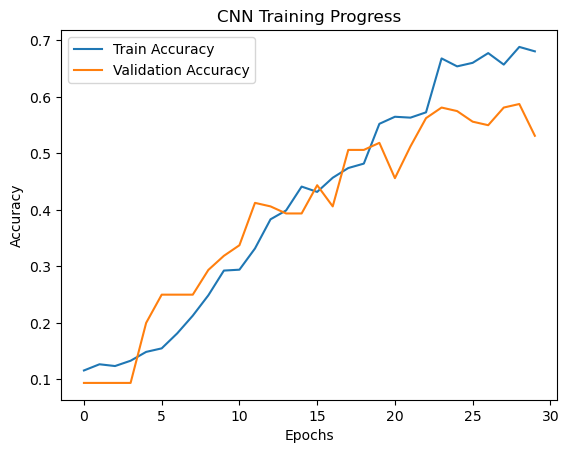

In [73]:
# Plotting CNN training history
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training Progress')
plt.show()

# SQL Queries
For more information, query the deatures CSV files using SQL.

In [55]:
import sqlite3

# Create SQLite database
conn = sqlite3.connect('music_features.db')

# Load CSV files into SQLite
features_30_sec = pd.read_csv('/home/aev64/cs210/Course Project - Final Submissions/features_30_sec.csv')
features_30_sec.to_sql('features_30_sec', conn, if_exists='replace', index=False)

features_3_sec = pd.read_csv('/home/aev64/cs210/Course Project - Final Submissions/features_3_sec.csv')
features_3_sec.to_sql('features_3_sec', conn, if_exists='replace', index=False)

9990

This is the average tempo for each genre.

In [56]:
query = """
SELECT label, AVG(tempo) as avg_tempo
FROM features_30_sec
GROUP BY label
ORDER BY avg_tempo DESC
"""
avg_tempo_df = pd.read_sql(query, conn)
print(avg_tempo_df)


       label   avg_tempo
0     reggae  129.279738
1  classical  127.920952
2      metal  124.873912
3      blues  120.742207
4      disco  120.341798
5       rock  120.262441
6       jazz  115.068143
7     hiphop  112.945646
8        pop  112.759957
9    country  110.858840


This will find the genre with the highest average spectral centroid.

In [57]:
query = """
SELECT label, AVG(spectral_centroid_mean) as avg_spectral_centroid
FROM features_30_sec
GROUP BY label
ORDER BY avg_spectral_centroid DESC
LIMIT 1
"""
spectral_centroid_df = pd.read_sql(query, conn)
print(spectral_centroid_df)

  label  avg_spectral_centroid
0   pop            3073.549538


This will compare the variance of mfcc1_mean between 30-sec and 3 sec splits.

In [58]:
query = """
SELECT '30_sec' as split_type, label, AVG(mfcc1_var) as avg_mfcc1_var
FROM features_30_sec
GROUP BY label
UNION ALL
SELECT '3_sec' as split_type, label, AVG(mfcc1_var) as avg_mfcc1_var
FROM features_3_sec
GROUP BY label
"""
mfcc1_comparison_df = pd.read_sql(query, conn)
print(mfcc1_comparison_df)

   split_type      label  avg_mfcc1_var
0      30_sec      blues    3659.266628
1      30_sec  classical    5280.625733
2      30_sec    country    3177.750647
3      30_sec      disco    3229.308129
4      30_sec     hiphop    4522.725272
5      30_sec       jazz    3216.950083
6      30_sec      metal    1572.232396
7      30_sec        pop    4205.445833
8      30_sec     reggae    5560.547677
9      30_sec       rock    3053.901740
10      3_sec      blues    3114.560509
11      3_sec  classical    2260.820116
12      3_sec    country    2317.972757
13      3_sec      disco    2757.973455
14      3_sec     hiphop    3805.259486
15      3_sec       jazz    2312.682188
16      3_sec      metal    1122.370102
17      3_sec        pop    3243.221677
18      3_sec     reggae    4960.702514
19      3_sec       rock    2191.617434


This will show the top 3 genres with the highest average zero crossing rate mean.

In [59]:
query = """
SELECT label, AVG(zero_crossing_rate_mean) as avg_zcr
FROM features_30_sec
GROUP BY label
ORDER BY avg_zcr DESC
LIMIT 3
"""
top_genres_df = pd.read_sql(query, conn)
print(top_genres_df)

   label   avg_zcr
0  metal  0.147463
1    pop  0.133561
2  disco  0.129367
